# Animating Neural Network

### trying to make something like https://playground.tensorflow.org/

Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

Define network

In [2]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(1, 6)
        self.fc2 = nn.Linear(6, 6)
        self.fc3 = nn.Linear(6, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

Define input (x) and target (y)

In [3]:
x = np.array([np.linspace(-3*np.pi,3*np.pi,100)])
x = np.transpose(x)

input = torch.from_numpy(x).float()
y = np.cos(x)
target = torch.from_numpy(y).float()

Define optimizer and loss criterion

In [4]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

[2000] loss: 0.472
[4000] loss: 0.295
[6000] loss: 0.147
[8000] loss: 0.090
[10000] loss: 0.058
[12000] loss: 0.040
[14000] loss: 0.028
[16000] loss: 0.021
[18000] loss: 0.017
[20000] loss: 0.015


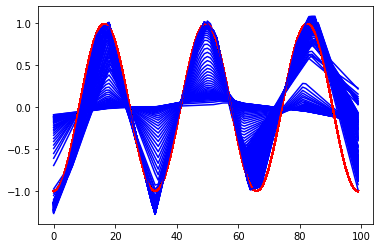

In [5]:
fig = plt.figure()
camera = Camera(fig)

running_loss = 0.0

for i in range(20000):
    # in your training loop:
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()    # Does the update
    
        
    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d] loss: %.3f' % (i + 1, running_loss / 2000))
        running_loss = 0.0
        
    if i%100 == 99:
        plt.plot(y, 'r')
        plt.plot(output.detach().numpy(), 'b')
        camera.snap()

In [6]:
animation = camera.animate()
animation.save('celluloid_minimal.gif', writer='PillowWriter')

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.
